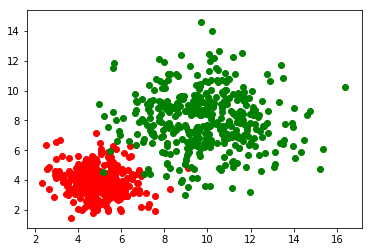

第0次训练
第200次训练
第400次训练
第600次训练
第800次训练
第1000次训练
第1200次训练
第1400次训练
第1600次训练
第1800次训练
第2000次训练
第2200次训练
第2400次训练
第2600次训练
第2800次训练
第3000次训练
第3200次训练
第3400次训练
第3600次训练
第3800次训练
第4000次训练
第4200次训练
第4400次训练
第4600次训练
第4800次训练
第5000次训练
第5200次训练
第5400次训练
第5600次训练
第5800次训练
第6000次训练
第6200次训练
第6400次训练
第6600次训练
第6800次训练
第7000次训练
第7200次训练
第7400次训练
第7600次训练
第7800次训练
第8000次训练
第8200次训练
第8400次训练
第8600次训练
第8800次训练
第9000次训练
第9200次训练
第9400次训练
第9600次训练
第9800次训练
第10000次训练
第10200次训练
第10400次训练
第10600次训练
第10800次训练
第11000次训练
第11200次训练
第11400次训练
第11600次训练
第11800次训练
第12000次训练
第12200次训练
第12400次训练
第12600次训练
第12800次训练
第13000次训练
第13200次训练
第13400次训练
第13600次训练
第13800次训练
第14000次训练
第14200次训练
第14400次训练
第14600次训练
第14800次训练
第15000次训练
第15200次训练
第15400次训练
第15600次训练
第15800次训练
第16000次训练
第16200次训练
第16400次训练
第16600次训练
第16800次训练
第17000次训练
第17200次训练
第17400次训练
第17600次训练
第17800次训练
第18000次训练
第18200次训练
第18400次训练
第18600次训练
第18800次训练
第19000次训练
第19200次训练
第19400次训练
第19600次训练
第19800次训练
第20000次训练
第20200次训练
第20400次训练
第20600次训练
第20800次训练
第21000次

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''造数据'''
def generate_data(seed):
    # 随机种子，这样每次生成的数据都一样，伪随机
    np.random.seed(seed)

    # 类别 class 1，300个样本
    data_size_1 = 300
    # feature 1  正态分布 ，loc均值， scale方差
    x1_1 = np.random.normal(loc=5.0,scale=1.0,size=data_size_1)
    # 特征2
    x2_1 = np.random.normal(loc=4.0,scale=1.0,size=data_size_1)
    # 标记 为0
    y_1 = np.zeros((300,1))

    # class 2
    data_size_2 = 400
    x1_2 = np.random.normal(loc=10.0,scale=2.0,size=data_size_2)
    x2_2 = np.random.normal(loc=8.0,scale=2.0,size=data_size_2)
    y_2 = np.ones((400,1))
	
    # 拼接 x1特征拼接，
    x1 = np.concatenate((x1_1,x1_2),axis=0)
    x2 = np.concatenate((x2_1,x2_2),axis=0)
    # 标记拼接
    y = np.concatenate((y_1,y_2),axis=0)

    # 合并总数据
    # 合并需要换成2维，所以需要转换一下形状 shape() 参数值为-1，表示总长度
    data = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1),y))
    # 打乱数据，洗牌
    
    np.random.shuffle(data)
    
 	 # 转成DataFrame 加一行偏置
    data = pd.DataFrame(data,columns=['V1','V2','Class'])
    y1 = data[data.Class==0]
    y2 =data[data.Class==1]
    data['b']=1
    x_data =data.loc[:,['b','V1','V2',]]
    y_data = data['Class']

    # 画图
    plt.scatter(y1['V1'],y1['V2'],c='red')
    plt.scatter(y2['V1'],y2['V2'],c='green')
    plt.show()
    return x_data,y_data

# 定义sigmoid函数，激活函数
def sigmod(y):
   res = 1/(1+np.exp(-y))
   return res

#逻辑回归
def LR(x_data,y_data):

    #权值两个
    w1= (np.random.random() - 0.5) * 2
    w2 =(np.random.random() - 0.5) * 2

    # 偏置
    b = 0
    lr=0.0001
    m = len(x_data)
    x_data = np.array(x_data)

    for i in range(100000):
        b_grad = 0
        w1_grad = 0
        w2_grad=0

        # 计算梯度的总和再求平均
        for j in range(len(x_data)):
            b,V1,V2 = x_data[j][0],x_data[j][1],x_data[j][2]

            z = w1*V1 + V2*w2 +b
            sig = sigmod(z)

            w1_grad += 1/m*(sig-y_data[j])*x_data[j][1]
            w2_grad += 1/m*(sig-y_data[j])*x_data[j][2]
            b_grad +=  1/m*(sig-y_data[j])


        # 更新 b 和 k
        w1 = w1 - (lr * w1_grad)
        w2 = w2 - (lr * w2_grad)
        b =b-(lr*b_grad)
        if i%200==0:
            print("第%s次训练"%i)
    return w1,w2,b


x_data,y_data = generate_data(2)
res = LR(x_data,y_data)

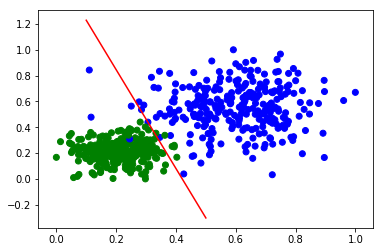

0.9791666666666666
0.6364764259418093


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 封装 LR 为一个类
class Logistic_Regression(object):

    def __init__(self, learning_rate=0.1, max_iter=100, seed=None):
        self.seed = seed
        self.lr = learning_rate
        self.max_iter = max_iter

    def fit(self, x, y):
        np.random.seed(self.seed)
        self.w = np.random.normal(loc=0.0, scale=1.0, size=x.shape[1])
        self.b = np.random.normal(loc=0.0, scale=1.0)
        self.x = x
        self.y = y
        for i in range(self.max_iter):
            self._update_step()

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _f(self, x, w, b):
        z = x.dot(w) + b
        return self._sigmoid(z)

    def predict_proba(self, x=None):
        if x is None:
            x = self.x
        y_pred = self._f(x, self.w, self.b)
        return y_pred

    def predict(self, x=None):
        if x is None:
            x = self.x
        y_pred_proba = self._f(x, self.w, self.b)
        y_pred = np.array([0 if y_pred_proba[i] < 0.5 else 1 for i in range(len(y_pred_proba))])
        return y_pred

    # 定义 精度
    def score(self, y_true=None, y_pred=None):
        if y_true is None or y_pred is None:
            y_true = self.y
            y_pred = self.predict()
        acc = np.mean([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))])
        return acc

    # 定义损失函数
    def loss(self, y_true=None, y_pred_proba=None):
        if y_true is None or y_pred_proba is None:
            y_true = self.y
            y_pred_proba = self.predict_proba()
        return np.mean(-1.0 * (y_true * np.log(y_pred_proba) + (1.0 - y_true) * np.log(1.0 - y_pred_proba)))

    # 计算梯度
    def _calc_gradient(self):
        y_pred = self.predict()
        d_w = (y_pred - self.y).dot(self.x) / len(self.y)
        d_b = np.mean(y_pred - self.y)
        return d_w, d_b

    # 更新模型参数
    def _update_step(self):
        d_w, d_b = self._calc_gradient()
        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b
        return self.w, self.b

# 随机生成训练数据
def generate_data(seed):
    np.random.seed(seed)
    data_size_1 = 400
    x1_1 = np.random.normal(loc=5.0, scale=1.0, size=data_size_1)
    x2_1 = np.random.normal(loc=4.0, scale=1.0, size=data_size_1)
    y_1 = [0 for _ in range(data_size_1)]
    data_size_2 = 400
    x1_2 = np.random.normal(loc=10.0, scale=2.0, size=data_size_2)
    x2_2 = np.random.normal(loc=8.0, scale=2.0, size=data_size_2)
    y_2 = [1 for _ in range(data_size_2)]
    x1 = np.concatenate((x1_1, x1_2), axis=0)
    x2 = np.concatenate((x2_1, x2_2), axis=0)

    x = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))
    y = np.concatenate((y_1, y_2), axis=0)
    data_size_all = data_size_1 + data_size_2
    shuffled_index = np.random.permutation(data_size_all)
    x = x[shuffled_index]
    y = y[shuffled_index]
    return x, y

# 划分训练集和测试集
def train_test_split(x, y):
    split_index = int(len(y) * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    return x_train, y_train, x_test, y_test

x, y = generate_data(seed=272)
x_train, y_train, x_test, y_test = train_test_split(x, y)

# 数据归一化
x_train = (x_train - np.min(x_train, axis=0)) / \
          (np.max(x_train, axis=0) - np.min(x_train, axis=0))
x_test = (x_test - np.min(x_test, axis=0)) / \
         (np.max(x_test, axis=0) - np.min(x_test, axis=0))

# 创建分类器
clf = Logistic_Regression(learning_rate=0.1, max_iter=500, seed=272)
clf.fit(x_train, y_train)

# 结果可视化
split_boundary_func = lambda x: (-clf.b - clf.w[0] * x) / clf.w[1]
xx = np.arange(0.1, 0.6, 0.1)
cValue = ['g', 'b']
plt.scatter(x_train[:, 0], x_train[:, 1], c=[cValue[i] for i in y_train], marker='o')
plt.plot(xx, split_boundary_func(xx), c='red')
plt.show()

# 结果预测、输出精度和损失
y_test_pred = clf.predict(x_test)
y_test_pred_proba = clf.predict_proba(x_test)
print(clf.score(y_test, y_test_pred))
print(clf.loss(y_test, y_test_pred_proba))

In [ ]:
class LogisticRegression(object):
    def __init__(self,learning_rate=0.1,max_iter=100,seed=None):
        self.seed=seed
        self.lr=learning_rate
        self.max_iter=max_iter
    def fit(self,x,y):
        np.random.seed(self.seed)
        self.w=np.random.normal(loc=0.0,scale=1.0,size=x.shape[1])
        self.b=np.random.normal(loc=0.0,scale=1.0)
        self.x=x
        self.y=y
        for i in range(self.max_iter):
            self._update_step()
            
    def _sigmod(self,z):
        return 1.0/(1.0+np.exp(-z))
    def _f(self,x,w,b):
        z=x.dot(w)+b
        return self._sigmod(z)
    #预测分类概率
    def prodict_proba(self,x=None):
        if x is None:
            x=self.x
        y_pred=self._f(x,self.w,self.b)
        return y_pred
               
    #预测函数
    def predict(self,x=None):
        if x is None:
            x=self.x
        y_pred_proda=self._f(x,self.w,self.b)
        y_pred=np.array([0 if y_pred_proda[i] < 0.5 else 1 for i in range(len(y_pred_proda))])
        return y_pred
        
    #精度
    def score(self,y_true=None,y_pred=None):
        if y_true is None or y_pred is None:
            y_true=self.y
            y_pred=self.predict()
        acc=np.mean([1 if y_true[i]==y_pred[i] else 0 for i in range(len(y_true))])
        return acc
    #定义损失函数
    def loss(self,y_true=None, y_pred_proba=None):
        if y_true is None or y_pred_proba is None:
            y_true = self.y
            y_pred_proba = self.prodict_proba()
            return np.mean(-1.0*(y_true* np.log(y_test_pred_proba)+(1.0-y_true)*np.log(1.0-y_pred_proba)))
    #更新模型参数
    def _update_step(self):
        d_w,d_b=self._calc_gradient()
        self.w=self.w-self.lr*d_w
        self.b=self.b-self.lr*d_b
    #计算梯度
    def _calc_gradient(self):
        y_pred=self.predict()
        d_w=(y_pred-self.y).dot(self.x)/len(self.y)
        d_b=np.meam(y_pred-self.y)
        return d_w,d_b
    
# 随机生成训练数据
def generate_data(seed):
    np.random.seed(seed)
    data_size_1 = 400
    x1_1 = np.random.normal(loc=5.0, scale=1.0, size=data_size_1)
    x2_1 = np.random.normal(loc=4.0, scale=1.0, size=data_size_1)
    y_1 = [0 for _ in range(data_size_1)]
    data_size_2 = 400
    x1_2 = np.random.normal(loc=10.0, scale=2.0, size=data_size_2)
    x2_2 = np.random.normal(loc=8.0, scale=2.0, size=data_size_2)
    y_2 = [1 for _ in range(data_size_2)]
    x1 = np.concatenate((x1_1, x1_2), axis=0)
    x2 = np.concatenate((x2_1, x2_2), axis=0)

    x = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))
    y = np.concatenate((y_1, y_2), axis=0)
    data_size_all = data_size_1 + data_size_2
    shuffled_index = np.random.permutation(data_size_all)
    x = x[shuffled_index]
    y = y[shuffled_index]
    return x, y

# 划分训练集和测试集
def train_test_split(x, y):
    split_index = int(len(y) * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    return x_train, y_train, x_test, y_test        
# 数据归一化，将值缩放到0~1之间
x_train = (x_train - np.min(x_train, axis=0)) / \
          (np.max(x_train, axis=0) - np.min(x_train, axis=0))
x_test = (x_test - np.min(x_test, axis=0)) / \
         (np.max(x_test, axis=0) - np.min(x_test, axis=0))

# 创建分类器
clf = Logistic_Regression(learning_rate=0.1, max_iter=500, seed=272)
clf.fit(x_train, y_train)

# 结果可视化
split_boundary_func = lambda x: (-clf.b - clf.w[0] * x) / clf.w[1]
xx = np.arange(0.1, 0.6, 0.1)
cValue = ['g', 'b']
plt.scatter(x_train[:, 0], x_train[:, 1], c=[cValue[i] for i in y_train], marker='o')
plt.plot(xx, split_boundary_func(xx), c='red')
plt.show()

# 结果预测、输出精度和损失
y_test_pred = clf.predict(x_test)
y_test_pred_proba = clf.predict_proba(x_test)
print(clf.score(y_test, y_test_pred))
print(clf.loss(y_test, y_test_pred_proba))

# 方案二


(800,)
(800,)
(800, 2)
(800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Accuracy: 0.7708333333333334


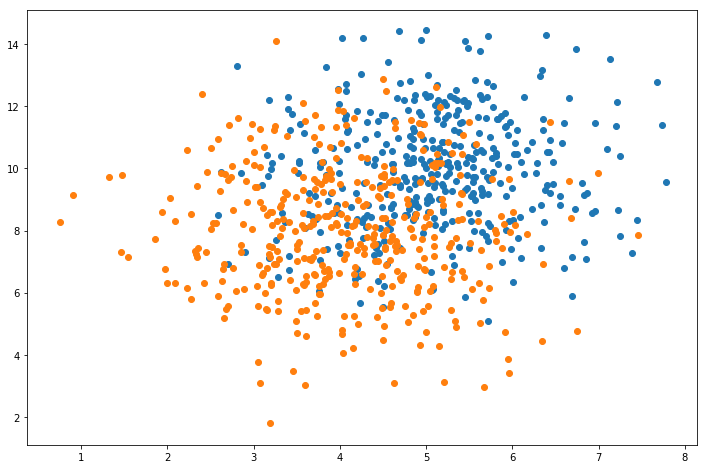

In [10]:
'''
独立手动创建数据，实现分类任务
'''
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_data(seed):
    np.random.seed(seed)
    data_size_1 = 400 # 类别 1
    x1_1 = np.random.normal(loc=5.0, scale=1.0, size=data_size_1) # 特征 1
    # print(x1_1)
    x1_2 = np.random.normal(loc=4.0, scale=1.0, size=data_size_1)  # 特征 2
    y_1 = [0 for i in range(data_size_1)]
    # print(y_1)

    data_size_2= 400  # 类别 1
    x2_1 = np.random.normal(loc=10.0, scale=2.0, size=data_size_2)  # 特征 1
    x2_2 = np.random.normal(loc=8.0, scale=2.0, size=data_size_2)  # 特征 2
    y_2 = [1 for i in range(data_size_2)]

    x1 = np.concatenate((x1_1, x1_2), axis=0)
    print(x1.shape) # (800,)
    x2 = np.concatenate((x2_1, x2_2), axis=0)
    print(x2.shape) # (800,)

    # 合成新的数据集 从水平方向拼接
    x = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))
    # x = normalize(x)
    print(x.shape)
    # 通过指定axis进行选择拼接方向
    y = np.concatenate((y_1, y_2), axis=0)
    print(y.shape)

    # 总数据
    data_size_all = data_size_1 + data_size_2

    # 随机打乱数据
    shuf_data = np.random.permutation(data_size_all)
    x = x[shuf_data]
    y = y[shuf_data]
    print(type(x)) # <class 'numpy.ndarray'>
    print(type(y)) # <class 'numpy.ndarray'>
    
    return  x, y

def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)

def train_test_split(x, y):
    split_index = int(len(y)*0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]
    return x_train, y_train, x_test, y_test
class Sigmoid:
    def function(self, x):
        return 1/(1 + np.exp(-x))

    def derivative(self, x):
        return self.function(x) * (1 - self.function(x))
class LogisticRegression():
    """
    手写逻辑回归算法
    learning_rate 学习率
    Sigmoid 激活函数
    """
    def __init__(self, learning_rate=.1):
        self.w = None
        self.learning_rate = learning_rate
        self.sigmoid = Sigmoid()
    def fit(self, X, y, n_iterations=4000):
        # 在第一列添加偏置列，全部初始化为 1
        X = np.insert(X, 0, 1, axis=1)
        X = X.reshape(X.shape[0], -1)
        y = y.reshape(y.shape[0], -1)

        n_samples, n_features = np.shape(X)

        # 参数初始化 [-1/n_features, 1/n_features]
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, 1))

        for i in range(n_iterations):
            # 通过初始化的参数 w 计算预测值
            y_pred = self.sigmoid.function(X.dot(self.w))
            # 梯度下降更新参数w.
            self.w -= self.learning_rate * \
                      X.T.dot(-(y - y_pred) * \
                        self.sigmoid.function(X.dot(self.w)) * \
                            (1 - self.sigmoid.function(X.dot(self.w))))


    def predict(self, X):
        # 训练模型时添加偏置，预测的时候也需要添加偏置
        X = X.reshape(X.shape[0], -1)
        X = np.insert(X, 0, 1, axis=1)
        # 预测
        y_pred = np.round(self.sigmoid.function(X.dot(self.w))).astype(int)
        return y_pred

x, y = generate_data(seed=20190601)
x_train, y_train, x_test, y_test = train_test_split(x, y)

# 数据归一化操作
x_train = (x_train - np.min(x_train, axis=0)) / \
          (np.max(x_train, axis=0) - np.min(x_train, axis=0))
x_test = (x_test - np.min(x_test, axis=0)) / \
         (np.max(x_test, axis=0) - np.min(x_test, axis=0))

clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accu = accuracy(y_test, y_pred)
print ("Accuracy:", accu)

plt.figure(figsize=(12, 8))
plt.scatter(x[y==0][:,0], x[y==0][:,1])
plt.scatter(x[y==1][:,0], x[y==1][:,1])
plt.show()


# 方案三  

In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import math

'''
独立手动创建数据，实现分类任务
'''

def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)

# 标准化数据集 X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)

    # 做除法运算时请永远记住分母不能等于0的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    return X_std

# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    n_train_samples = int(X.shape[0] * (1-test_size))
    x_train, x_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]
    return x_train, x_test, y_train, y_test

# 将一个向量转换成对角阵，其中对角阵上的元素就是向量中元素
def vec2diagonal(vec):
    vec_length = len(vec)
    diagonal = np.zeros((vec_length, vec_length))
    for i in range(vec_length):
        diagonal[i][i] = vec[i]
    return diagonal

def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)

class Sigmoid:
    def function(self, x):
        return 1/(1 + np.exp(-x))

    def derivative(self, x):
        return self.function(x) * (1 - self.function(x))

class LogisticRegression():
    """
    手写逻辑回归算法
    learning_rate 学习率
    Sigmoid 激活函数
    """
    def __init__(self, learning_rate=.1):
        self.w = None
        self.learning_rate = learning_rate
        self.sigmoid = Sigmoid()

    def fit(self, X, y, n_iterations=4000):
        # 在第一列添加偏置列，全部初始化为 1
        X = np.insert(X, 0, 1, axis=1)
        X = X.reshape(X.shape[0], -1)
        y = y.reshape(y.shape[0], -1)

        n_samples, n_features = np.shape(X)

        # 参数初始化 [-1/n_features, 1/n_features]
        limit = 1 / math.sqrt(n_features)
        # uniform 第三个参数tupe表示每个维度，比如 (2,3,4) 第一个维度有2个元素 第二个维度有3个元素 第三个维度有4个元素
        self.w = np.random.uniform(-limit, limit, (n_features, 1))

        for i in range(n_iterations):
            # 通过初始化的参数 w 计算预测值
            y_pred = self.sigmoid.function(X.dot(self.w))
            # 梯度下降更新参数w.
            self.w -= self.learning_rate * \
                      X.T.dot(-(y - y_pred) * \
                        self.sigmoid.function(X.dot(self.w)) * \
                            (1 - self.sigmoid.function(X.dot(self.w))))

    def predict(self, X):
        # 训练模型时添加偏置，预测的时候也需要添加偏置
        X = X.reshape(X.shape[0], -1)
        X = np.insert(X, 0, 1, axis=1)
        # 预测
        y_pred = np.round(self.sigmoid.function(X.dot(self.w))).astype(int)
        return y_pred

def main():
    # 加载数据集
    data = datasets.load_iris()
    X = normalize(data.data[data.target != 0])
    y = data.target[data.target != 0]
    y[y == 1] = 0
    y[y == 2] = 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, seed=1)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accu = accuracy(y_test, y_pred)
    print ("Accuracy:", accu) # Accuracy: 0.9393939393939394

    plt.figure(figsize=(12, 8))
    plt.scatter(X[y==0][:,0], X[y==0][:,1])
    plt.scatter(X[y==1][:,0], X[y==1][:,1])
    plt.show()

if __name__ == "__main__":
    main()



Accuracy: 0.9393939393939394


<Figure size 1200x800 with 1 Axes>